# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
wine_df = pd.DataFrame(data=np.c_[data['data'], data['target']], columns = data['feature_names'] + ['target'])
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [23]:
n_clusters = 8

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)

model = cluster.fit(X_std)
model.labels_

array([7, 7, 6, 6, 2, 6, 7, 7, 7, 7, 6, 7, 7, 6, 6, 6, 6, 6, 6, 7, 7, 0,
       7, 7, 7, 2, 7, 7, 2, 7, 6, 6, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0,
       7, 7, 7, 7, 6, 6, 7, 6, 6, 6, 7, 6, 7, 6, 6, 3, 5, 5, 3, 3, 4, 4,
       3, 3, 5, 3, 5, 2, 4, 2, 3, 3, 3, 5, 3, 0, 3, 3, 4, 5, 0, 3, 4, 4,
       4, 4, 4, 4, 4, 0, 3, 2, 2, 3, 3, 0, 3, 3, 0, 3, 3, 4, 3, 4, 3, 0,
       0, 0, 4, 4, 4, 4, 3, 4, 5, 0, 0, 2, 4, 0, 0, 0, 0, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1,
       1, 1])

In [25]:
from sklearn.metrics import silhouette_score

#Silhouette score

pred = cluster.fit_predict(X_std)
center = cluster.cluster_centers_

score = silhouette_score(X_std, pred, metric= "euclidean")

print("With ",n_clusters, "clusters, there is a silhouette score of",score)

# Should I do here the Standard Scaling? I
# I had first without Standardscaler and had 53%
# I saw some other labs they did it, but they had a acurancy of 15%. Is that better? And why do I have only 13%?
# I mean that would be closer at the 0% which is the inversion of the statement?

With  8 clusters, there is a silhouette score of 0.13311489125347803


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [26]:
n_clusters = 5

cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)

model = cluster.fit(X_std)
pred = cluster.fit_predict(X_std)
center = cluster.cluster_centers_

score = silhouette_score(X_std, pred, metric= "euclidean")

print("With ",n_clusters, "clusters, there is a silhouette score of",score)

With  5 clusters, there is a silhouette score of 0.23187479572412723


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [28]:
n_clusters = 3

cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)

model = cluster.fit(X_std)
pred = cluster.fit_predict(X_std)
center = cluster.cluster_centers_

score = silhouette_score(X_std, pred, metric= "euclidean")

print("With ",n_clusters, "clusters, there is a silhouette score of",score)

With  3 clusters, there is a silhouette score of 0.28594199657074876


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [29]:
from yellowbrick.cluster import KElbowVisualizer

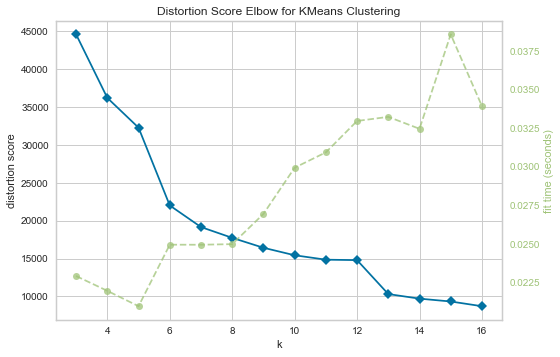

In [36]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,17))
visualizer.fit(X)
visualizer.poof()

# 6
#why does my plot look so dfferent to Sofias for example?
# when I use X_std I get a totally different curve

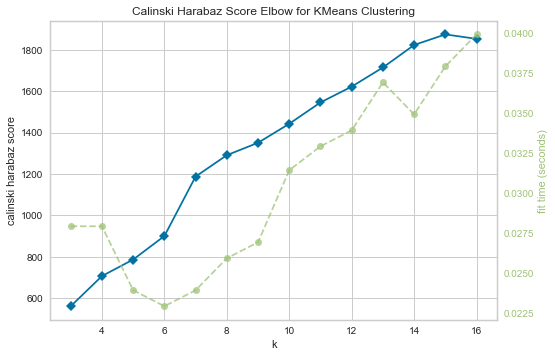

In [32]:
#calinski_harabaz
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,17),metric='calinski_harabaz')
visualizer.fit(X)
visualizer.poof()

#6 "knie"

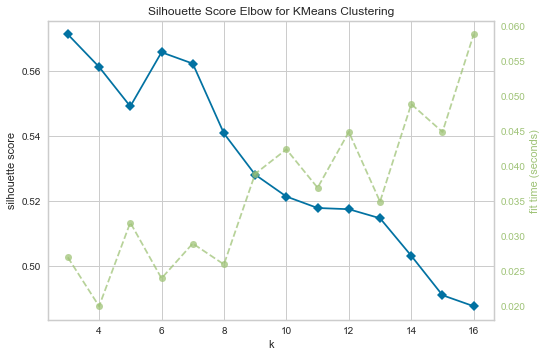

In [33]:
#silhouette
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,17),metric='silhouette')
visualizer.fit(X)
visualizer.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [37]:
# Hierarchical

from sklearn.cluster import AgglomerativeClustering

n_clusters = 5

cluster_agg = AgglomerativeClustering(n_clusters=n_clusters)
model_agg = cluster_agg.fit(X)


In [ ]:
# distortion 

model_agg = AgglomerativeClustering()
visualizer = KElbowVisualizer(model_agg, k=(3,17))
visualizer.fit(X)
visualizer.poof()

# 7

In [ ]:
visualizer = KElbowVisualizer(model_agg, k=(3,17), metric="silhouette")
visualizer.fit(X)
visualizer.poof()

# 5

In [ ]:
visualizer = KElbowVisualizer(model_agg, k=(3,17), metric='calinski_harabaz')
visualizer.fit(X)
visualizer.poof()

#5

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

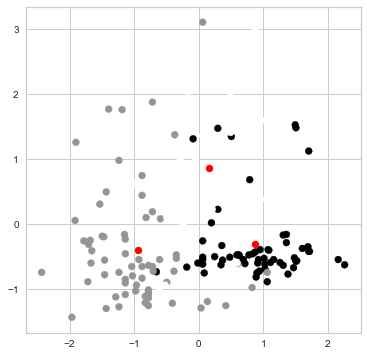

In [42]:
# KMean, clusters = 6

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


plt.figure(figsize=(6,6))
plt.scatter(X_std[:, 0], X_std[:, 1], c=pred)

plt.scatter(center[:, 0], center[:, 1], c='red', s=50)#, alpha=0.75)

plt.show()


## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

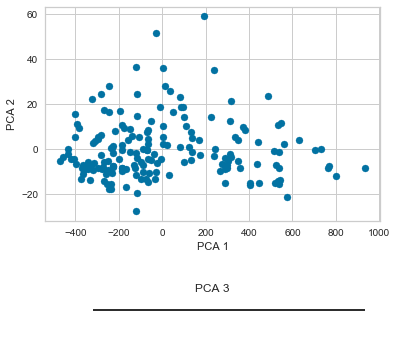

In [45]:
fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_X[:, 0], pca_X[:, 1])
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(X.shape[0])
ax[1].plot(pca_X[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

# is that right? I cant see any cluster

## Bonus

## Generate a series of t-SNE plots showing the clusters at a variety of perplexities.